In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.TabTransformer import TabTransformer

In [4]:
model = TabTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="classification",
    num_classes=1
    )

--- Preprocessing ---


10it [00:01,  9.44it/s]


In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
model.fit(model.training_dataset, epochs=100, validation_data=model.validation_dataset)



Epoch 1/100


1/1 [==============================] - 9s 9s/step - loss: 3.3897 - accuracy: 0.5916 - val_loss: 0.7410 - val_accuracy: 0.7040
Epoch 2/100
1/1 [==============================] - 0s 208ms/step - loss: 0.9681 - accuracy: 0.6016 - val_loss: 0.7844 - val_accuracy: 0.5760
Epoch 3/100
1/1 [==============================] - 0s 234ms/step - loss: 0.7923 - accuracy: 0.5876 - val_loss: 0.6522 - val_accuracy: 0.6400
Epoch 4/100
1/1 [==============================] - 0s 189ms/step - loss: 0.6735 - accuracy: 0.6175 - val_loss: 0.6769 - val_accuracy: 0.6800
Epoch 5/100
1/1 [==============================] - 0s 172ms/step - loss: 0.6791 - accuracy: 0.5837 - val_loss: 0.7231 - val_accuracy: 0.3840
Epoch 6/100
1/1 [==============================] - 0s 174ms/step - loss: 0.7125 - accuracy: 0.4721 - val_loss: 0.7403 - val_accuracy: 0.3680
Epoch 7/100
1/1 [==============================] - 0s 187ms/step - loss: 0.7221 - accuracy: 0.4522 - val_loss: 0.6781 - val_accuracy: 0.4400
Epoch 8/100
1/1 [===========

In [6]:
model.summary()

Model: "tab_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_transformer_encoder (T  multiple                  144484    
 abTransformerEncoder)                                           
                                                                 
 sequential_4 (Sequential)   (None, 56)                31752     
                                                                 
 dense_10 (Dense)            multiple                  57        
                                                                 
Total params: 176293 (688.64 KB)
Trainable params: 176293 (688.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 1s 1s/step


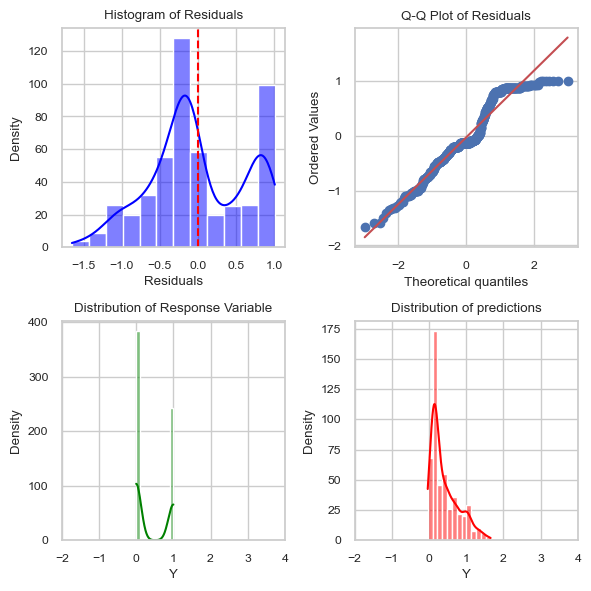

In [7]:
model.analytics_plot()